## Linear regression workbook

This workbook will walk you through a linear regression example. It will provide familiarity with Jupyter Notebook and Python.  Please print (to pdf) a completed version of this workbook for submission with HW #1.

ECE C147/C247 Winter Quarter 2022, Prof. J.C. Kao, TAs Y. Li, P. Lu, T. Monsoor, T. wang

In [114]:
import numpy as np 
import matplotlib.pyplot as plt

#allows matlab plots to be generated in line
%matplotlib inline 

### Data generation

For any example, we first have to generate some appropriate data to use. The following cell generates data according to the model: $y = x - 2x^2 + x^3 + \epsilon$

Text(0, 0.5, '$y$')

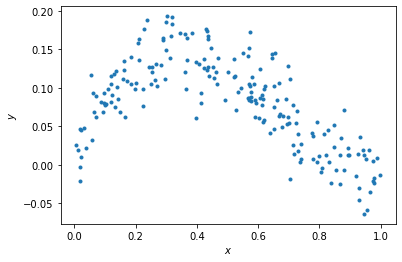

In [115]:
np.random.seed(0)  # Sets the random seed.
num_train = 200     # Number of training data points

# Generate the training data
x = np.random.uniform(low=0, high=1, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

### QUESTIONS:

Write your answers in the markdown cell below this one:

(1) What is the generating distribution of $x$?

(2) What is the distribution of the additive noise $\epsilon$?

### ANSWERS:

(1) The generating distribution of x is a uniform distribution on the range [0,1].

(2) The distribution of the random noise $\epsilon$ is gaussian with mean 0 and standard deviation 0.03.

### Fitting data to the model (5 points)

Here, we'll do linear regression to fit the parameters of a model $y = ax + b$.

In [116]:
# xhat = (x, 1)
xhat = np.vstack((x, np.ones_like(x)))
# ==================== #
# START YOUR CODE HERE #
# ==================== #
# GOAL: create a variable theta; theta is a numpy array whose elements are [a, b]
theta = np.linalg.pinv(xhat).T@y # please modify this line

# ================== #
# END YOUR CODE HERE #
# ================== #

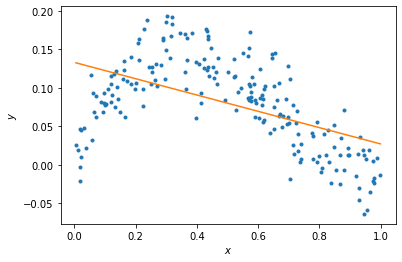

In [117]:
# Plot the data and your model fit.
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression line
xs = np.linspace(min(x), max(x),50)
xs = np.vstack((xs, np.ones_like(xs)))
plt.plot(xs[0,:], theta.dot(xs))

### QUESTIONS

(1) Does the linear model under- or overfit the data?

(2) How to change the model to improve the fitting?

### ANSWERS

(1) The linear model underfits the data. This is clear because the linear model does not account for the downturn in the data at both low an dhigh values of x. This curve of the data could be better fit with a higher order model.

(2) We can change our model to imporve the fitting by adding higher order terms to our model. That is, our model should contain higher order polkynomial terms to accound for the maxima and minima in our dataset. polynomials of degree $\geq 2$ should be able to begin accounting for this phenomena; however, we will want to be conscious of potentially overfitting our data.

### Fitting data to the model (10 points)

Here, we'll now do regression to polynomial models of orders 1 to 5.  Note, the order 1 model is the linear model you prior fit.

In [118]:

N = 5
xhats = []
thetas = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable thetas.
# thetas is a list, where theta[i] are the model parameters for the polynomial fit of order i+1.
#   i.e., thetas[0] is equivalent to theta above.
#   i.e., thetas[1] should be a length 3 np.array with the coefficients of the x^2, x, and 1 respectively.
#   ... etc.
x_hat = np.vstack((x, np.ones_like(x)))
thetas.append(np.linalg.pinv(xhat).T@y)
xhats.append(x_hat[1])
xhats.append(x_hat[0])
for n in range(N-1):
    x_hat = np.vstack((x_hat*x, np.ones_like(x)))
    theta_temp = np.linalg.pinv(x_hat).T@y # please modify this line
    thetas.append(theta_temp)
    xhats.append(x_hat[0])

# ================== #
# END YOUR CODE HERE #
# ================== #

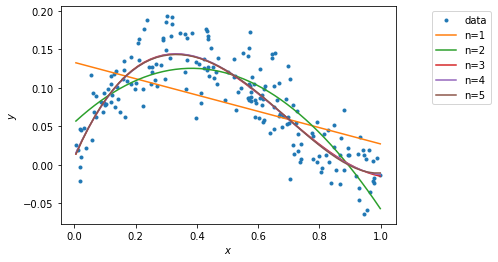

In [119]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

### Calculating the training error (10 points)

Here, we'll now calculate the training error of polynomial models of orders 1 to 5:

$L(\theta) = \frac{1}{2}\sum_{j}(\hat{y}_j - y_j)^2$

In [120]:
training_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable training_errors, a list of 5 elements,
# where training_errors[i] are the training loss for the polynomial fit of order i+1.
for i in range(N):
    yhat = np.matmul(np.flip(thetas[i]),xhats[0:len(thetas[i])])
    training_errors.append(0.5*sum((yhat-y)**2))
# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Training errors are: \n', training_errors)

Training errors are: 
 [0.23799610883627023, 0.1092492220926853, 0.0816960380110537, 0.08165353735296972, 0.08161479195525288]


### QUESTIONS

(1) Which polynomial model has the best training error?

(2) Why is this expected?

### ANSWERS

(1) Our $5^{th}$ order polynomial had the best training error.

(2) it is expected that our highest order polynomial should have the best training error because it can always acheive at least the same error as a lower degree polynomial through setting the highest order coefficient to zero. This means that if the higher order term can allow us to reduce the error it will, but it will never increase the training error. So we would expect our highest order polynomial to have the smallest error (even if it is tied with simpler models).

### Generating new samples and validation error (5 points)

Here, we'll now generate new samples and calculate the validation error of polynomial models of orders 1 to 5.

Text(0, 0.5, '$y$')

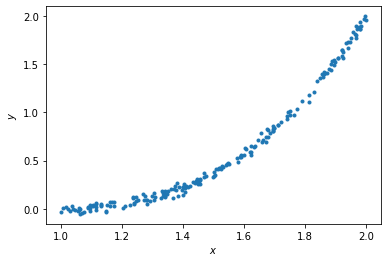

In [121]:
x = np.random.uniform(low=1, high=2, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [122]:
xhats = []
for i in np.arange(N):
    if i == 0:
        xhat = np.vstack((x, np.ones_like(x)))
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        xhat = np.vstack((x**(i+1), xhat))
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))
                              
    xhats.append(xhat)

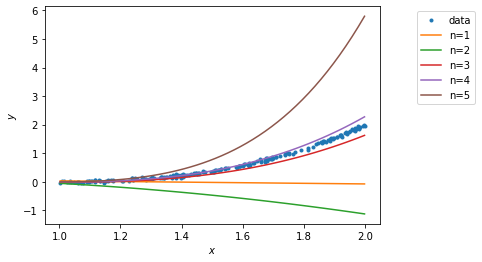

In [123]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

In [127]:
validation_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #
# GOAL: create a variable validation_errors, a list of 5 elements,
# where validation_errors[i] are the validation loss for the polynomial fit of order i+1.
for i in range(N):
    yhat = np.matmul(thetas[i],xhats[i])
    validation_errors.append(0.5*sum((yhat-y)**2))
# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Validation errors are: \n', validation_errors)

Validation errors are: 
 [80.86165184550588, 213.19192445058195, 3.125697108339941, 1.187076519846909, 214.91021807283732]


### QUESTIONS

(1) Which polynomial model has the best validation error?

(2) Why does the order-5 polynomial model not generalize well?

### ANSWERS

(1) The fourth order polynomial has the best validaion error.

(2) Our fifth order polynomial does not generalize well because it is overfit to the training data. In scheiving a higher poerformance on the training data it loses generalizability to data outside of the initial bounds of the training data. The fact that it has low training error and high validation error is a sign that the order-5 polynomial is an overfit model. 